In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.reset_defaults
sns.set_style(style='darkgrid')
import matplotlib.pyplot as plt
plt.style.use('ggplot')
font = {'size'   : 16}
plt.rc('font', **font)
plt.ion()
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams["figure.figsize"] = (20.0, 10.0)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 2000)
%matplotlib inline

In [2]:
housing_df = pd.read_csv("../data/kc_house_data.csv")

In [3]:
housing_df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12801,7701700040,20140925T000000,320000.0,3,1.75,1510,30185,1.5,0,0,3,7,1510,0,1976,0,98058,47.4118,-122.089,1470,12465
9292,2771602450,20140826T000000,370000.0,2,1.50,1010,2102,2.0,0,0,3,7,1010,0,1984,0,98119,47.6374,-122.375,1480,2632
15710,7568700525,20150318T000000,326000.0,2,1.00,1210,7440,1.0,0,0,3,6,780,430,1940,0,98155,47.7376,-122.322,1070,7440
7508,3178100065,20140925T000000,676101.0,4,1.50,2270,6010,1.0,0,0,3,8,1290,980,1954,0,98115,47.6743,-122.269,2120,5987
15230,3754501205,20150429T000000,1090000.0,3,2.50,2840,7500,2.0,0,3,3,11,2840,0,1997,0,98034,47.7049,-122.224,2580,5918
8779,3343900120,20150126T000000,380000.0,4,1.75,2260,7200,1.5,0,0,5,7,1360,900,1924,0,98056,47.5122,-122.186,1410,7465
10321,325049234,20140909T000000,925000.0,4,2.50,3110,11422,2.0,0,0,3,9,3110,0,1989,0,98115,47.6833,-122.271,2850,7254
4306,2770604365,20140623T000000,649950.0,3,2.50,1500,1375,2.0,0,0,3,9,1200,300,2014,0,98119,47.6451,-122.375,1680,1627
8359,4364700945,20150402T000000,459000.0,4,2.00,2360,7080,1.0,0,0,5,6,1180,1180,1925,0,98126,47.5261,-122.376,1340,7200
18006,7224500375,20140715T000000,305000.0,3,1.00,1030,5350,1.0,0,0,3,7,1030,0,1924,2009,98055,47.4905,-122.206,1030,5250


In [4]:
# check time component
print(housing_df['date'].max())
print(housing_df['date'].min())

20150527T000000
20140502T000000


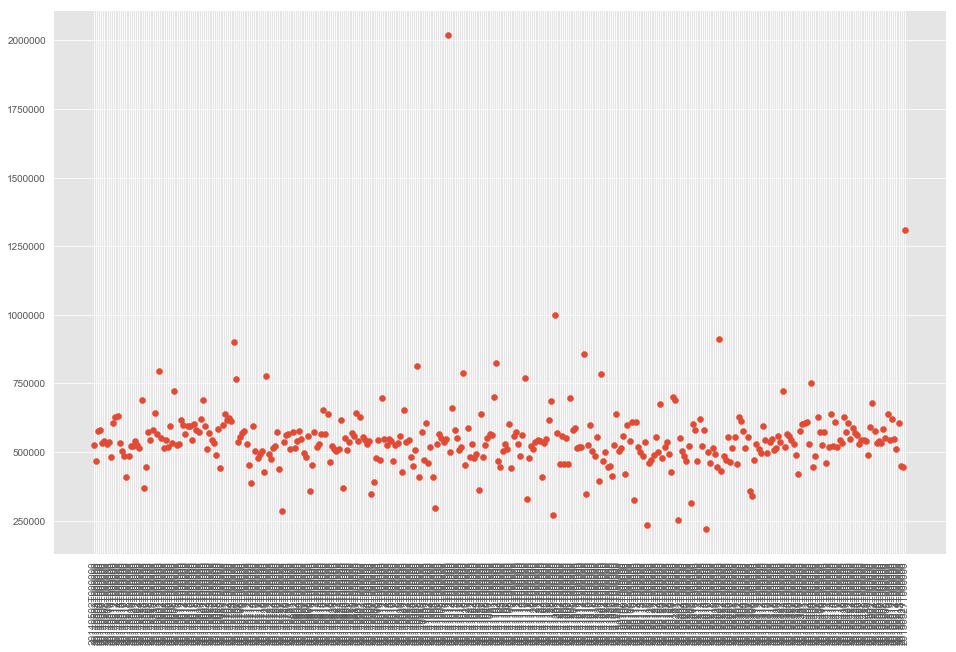

In [5]:
# plot avg price against date
x=housing_df['date'].unique()
x.sort()

y = []
for val in x:
    y.append(housing_df[housing_df['date'] == val]['price'].mean())

plt.figure(figsize=(16,10))
plt.scatter(x, y)
plt.xticks(rotation=90)
plt.show()

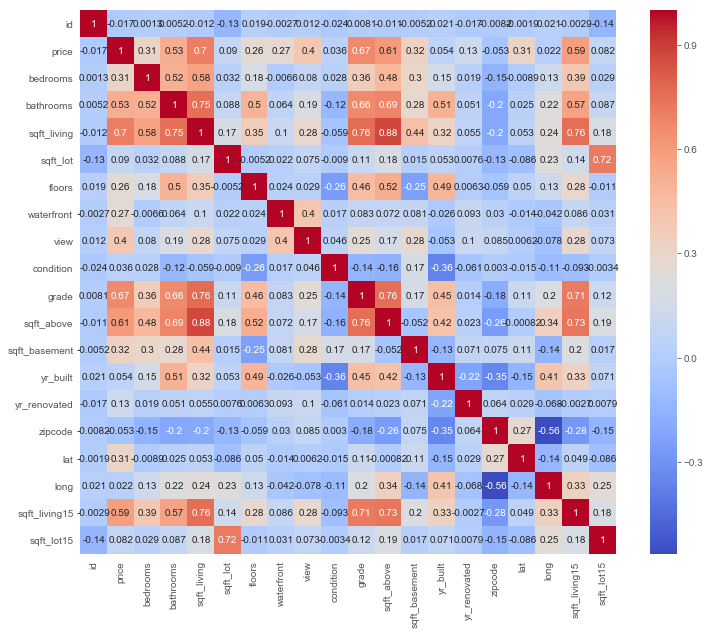

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(housing_df.corr(), annot=True, cmap='coolwarm')

In [7]:
abs(housing_df.corr().loc['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.525134
view             0.397346
sqft_basement    0.323837
bedrooms         0.308338
lat              0.306919
waterfront       0.266331
floors           0.256786
yr_renovated     0.126442
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.053982
zipcode          0.053168
condition        0.036392
long             0.021571
id               0.016797
Name: price, dtype: float64

In [8]:
features = list(abs(housing_df.corr().loc['price']).sort_values(ascending=False).index[1:13])

In [11]:
features

['sqft_living',
 'grade',
 'sqft_above',
 'sqft_living15',
 'bathrooms',
 'view',
 'sqft_basement',
 'bedrooms',
 'lat',
 'waterfront',
 'floors',
 'yr_renovated']

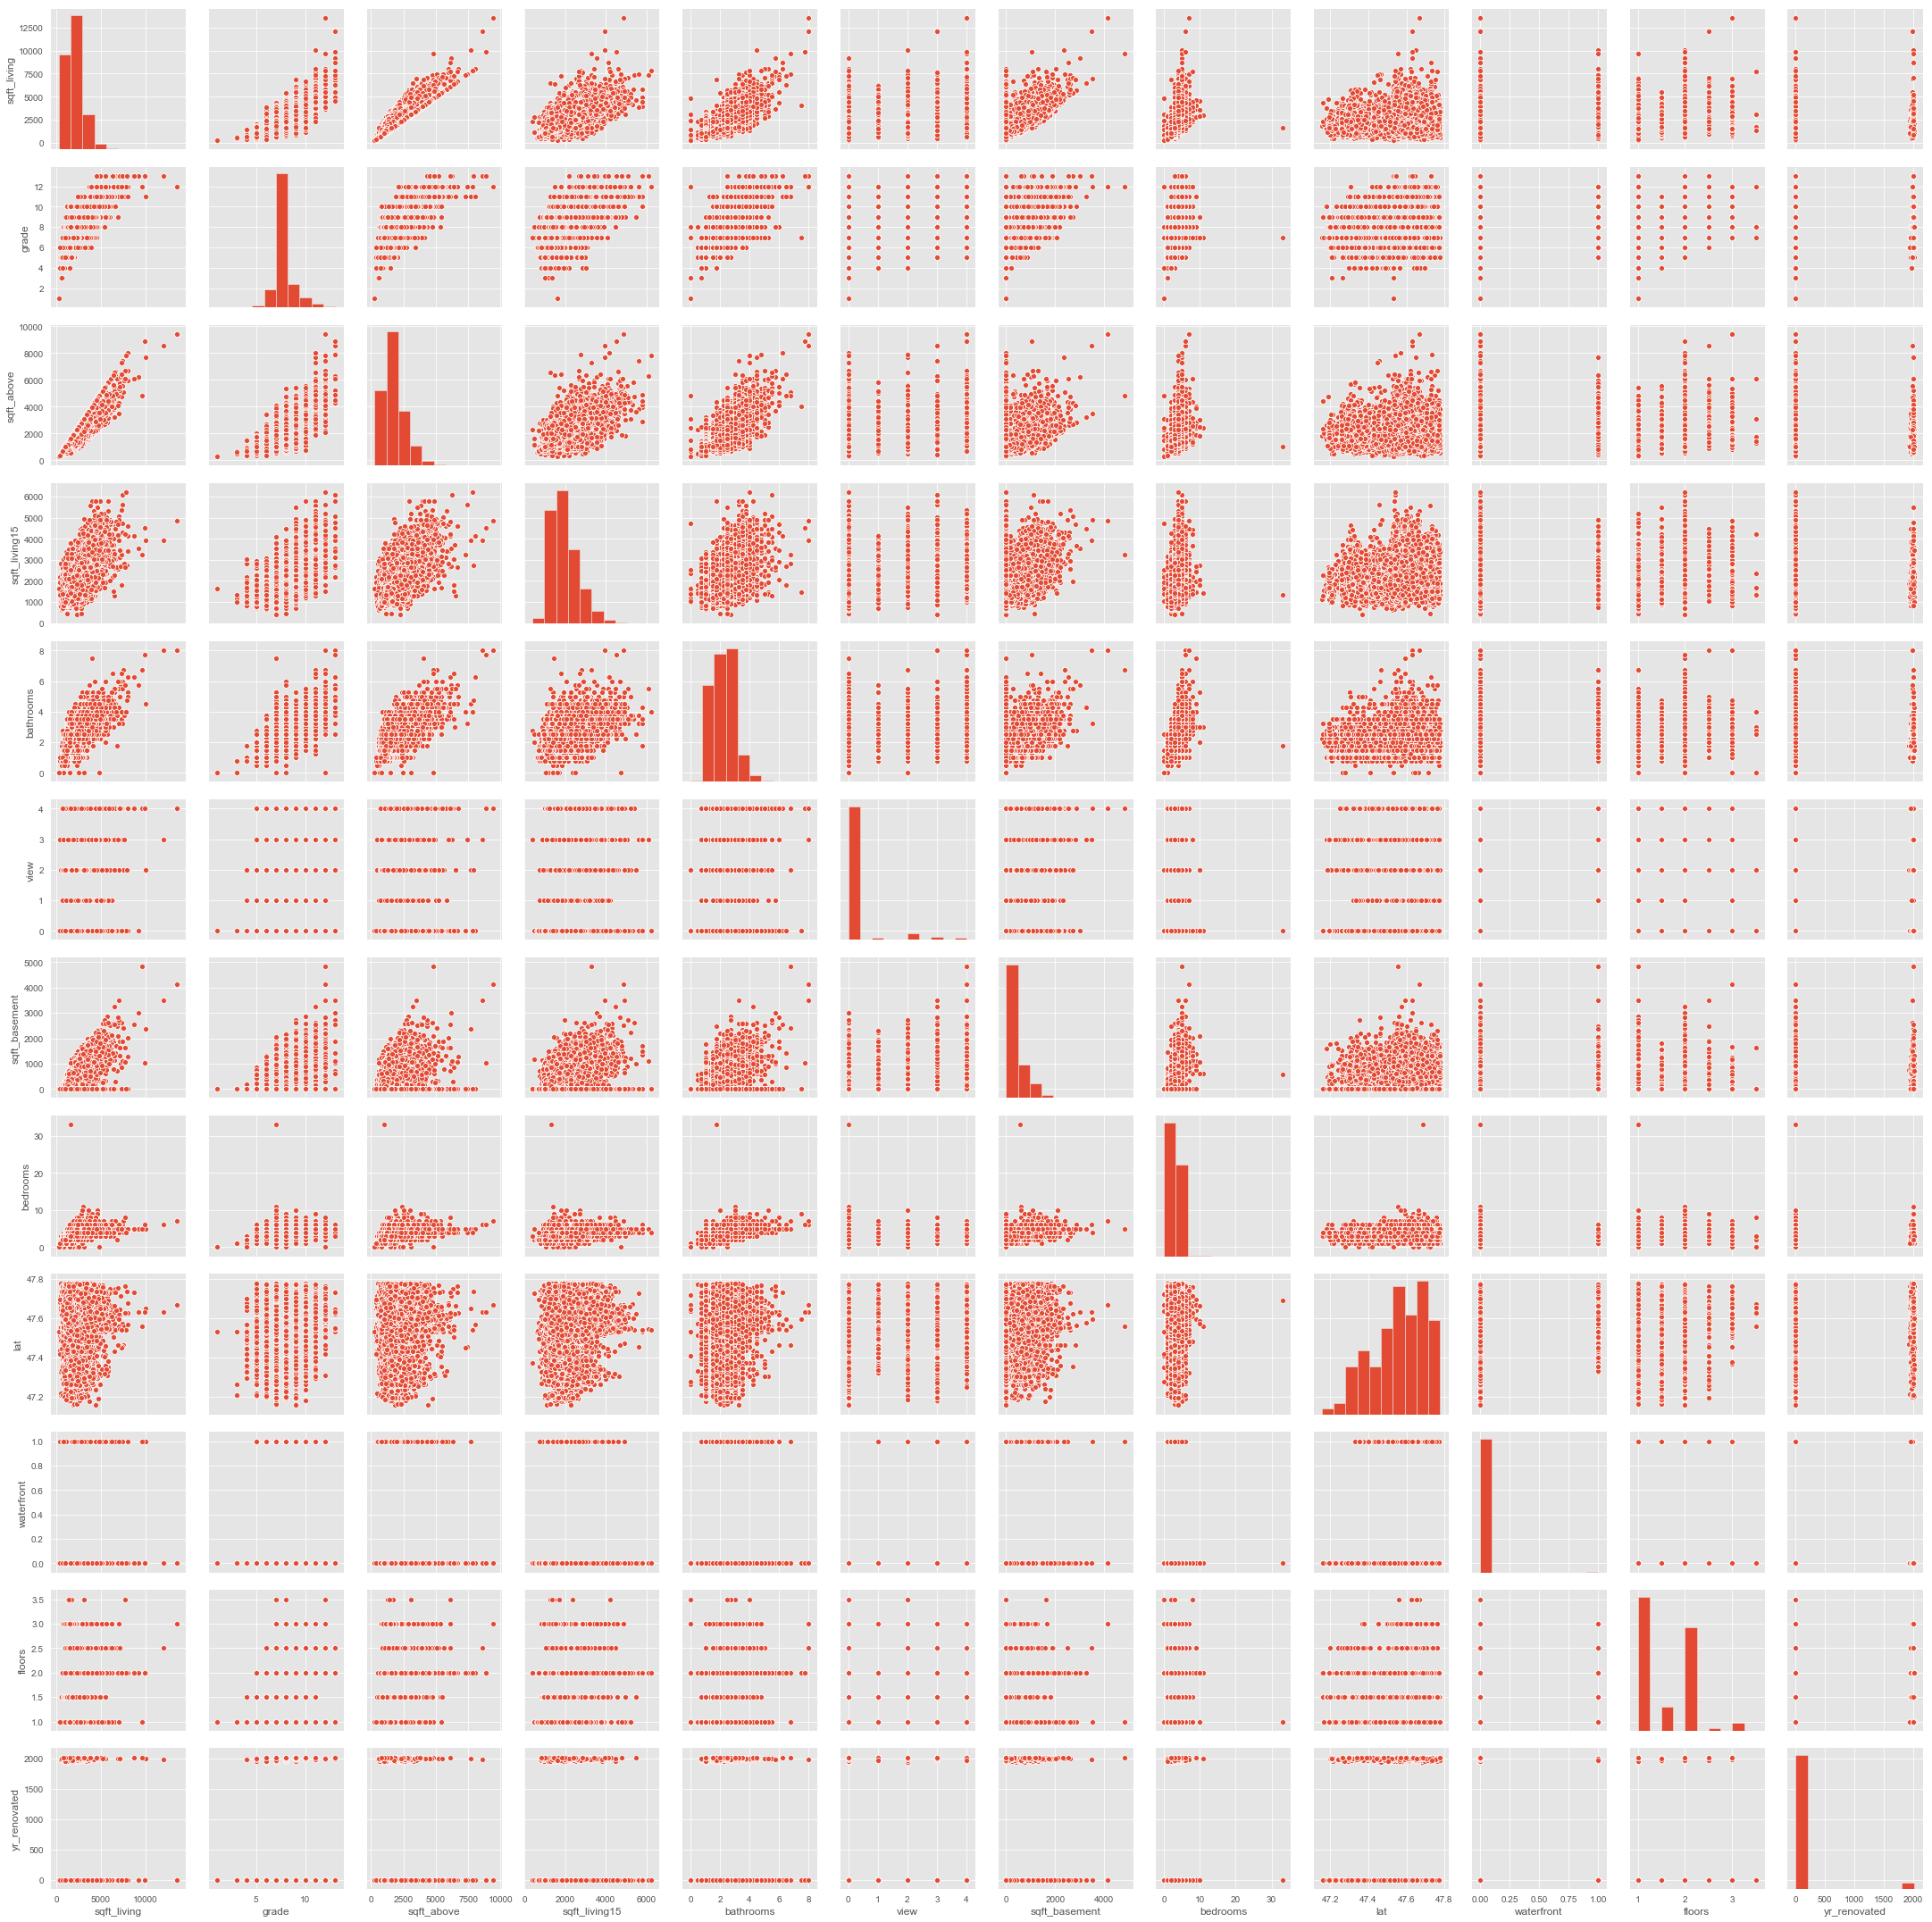

In [12]:
sns.pairplot(housing_df[features])

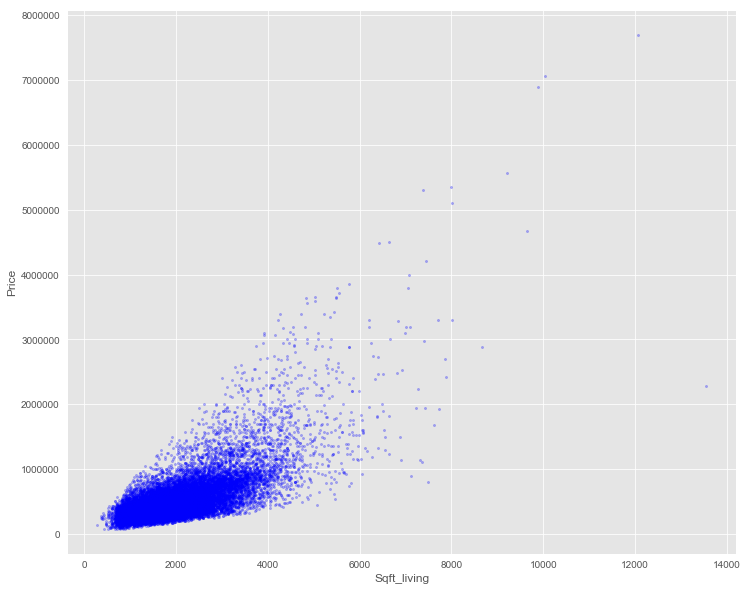

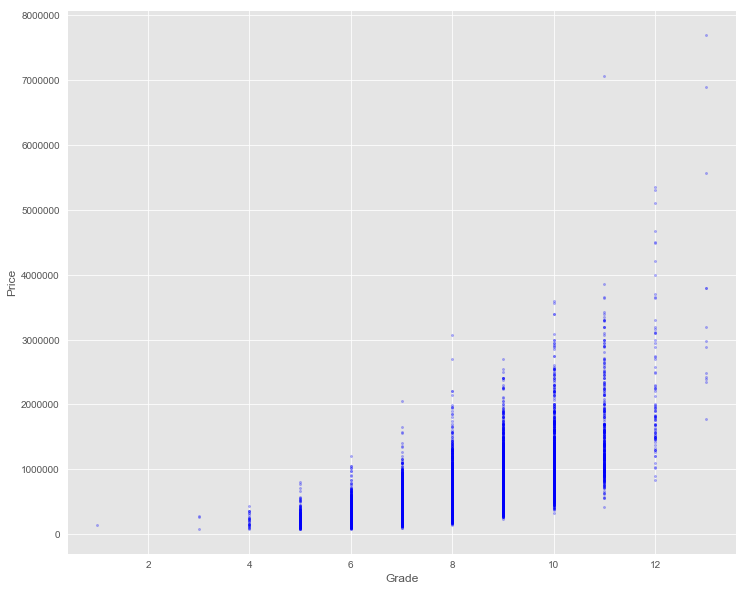

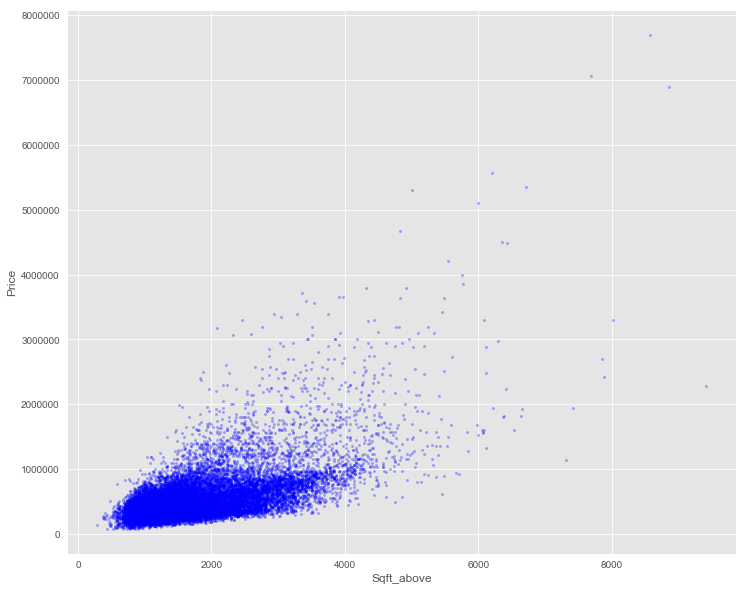

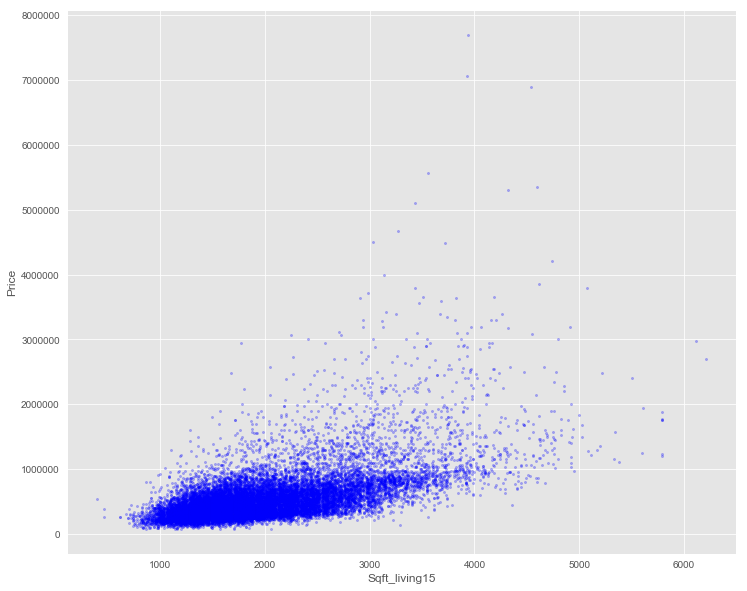

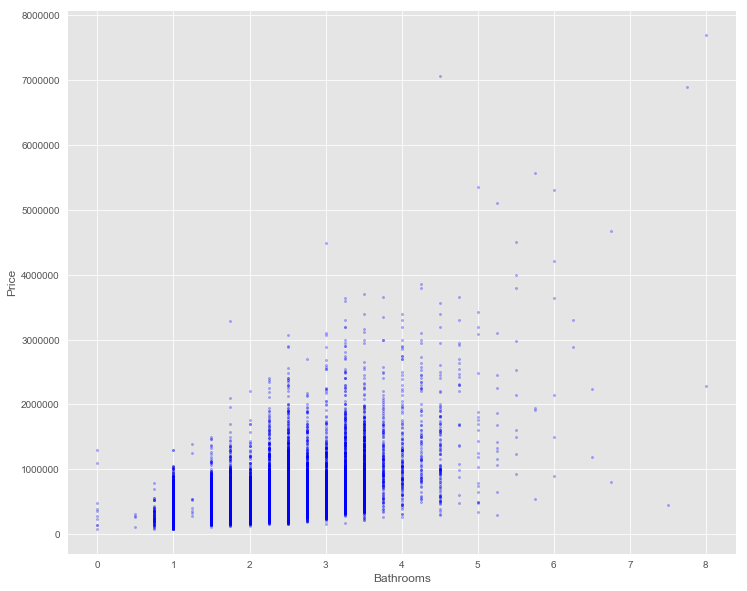

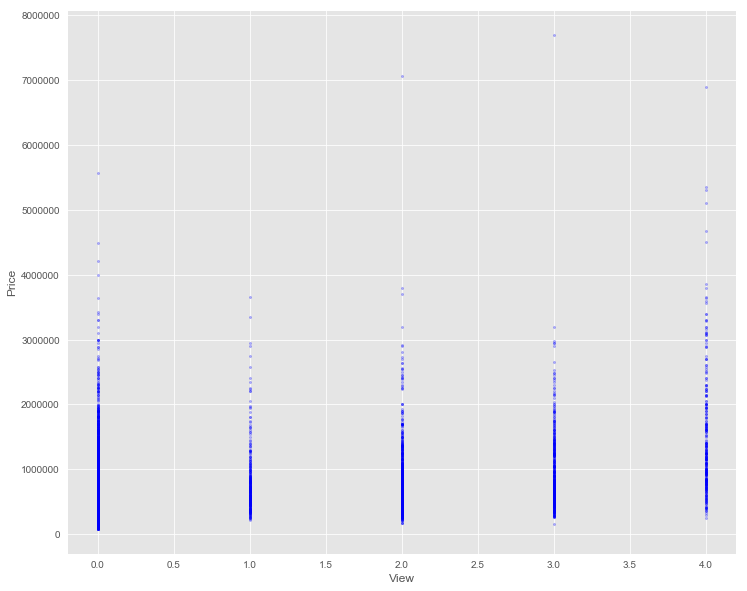

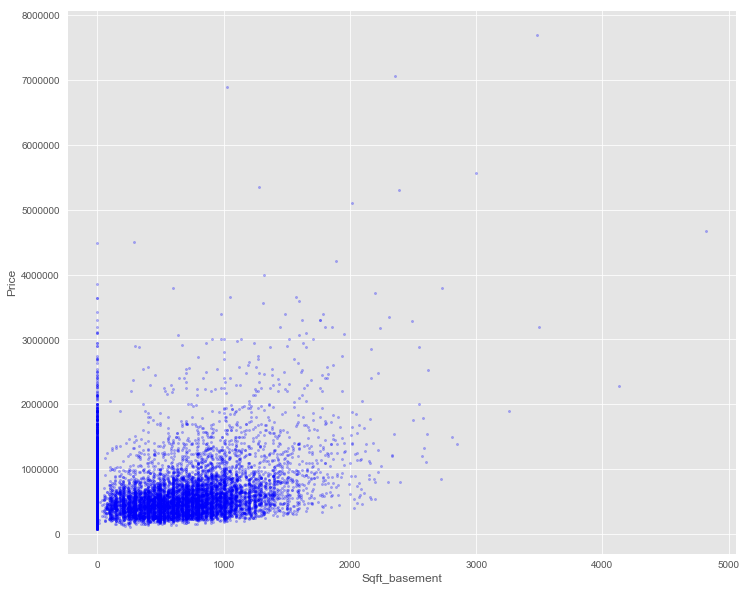

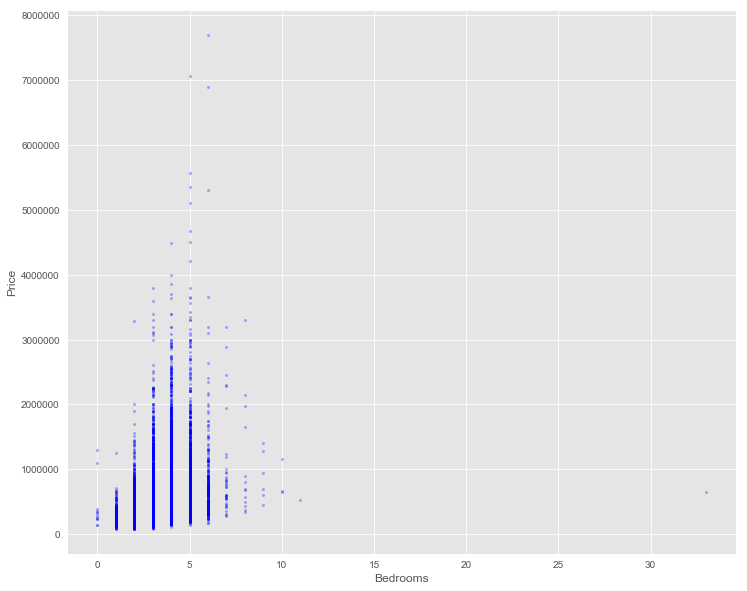

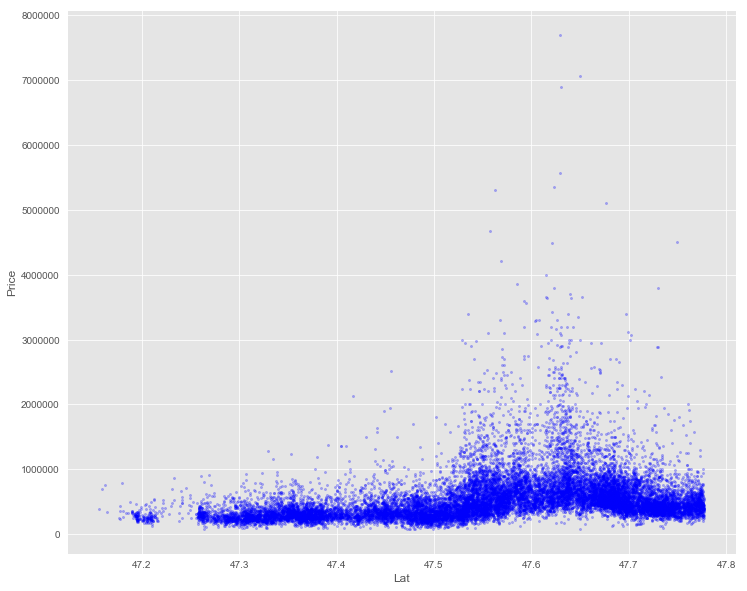

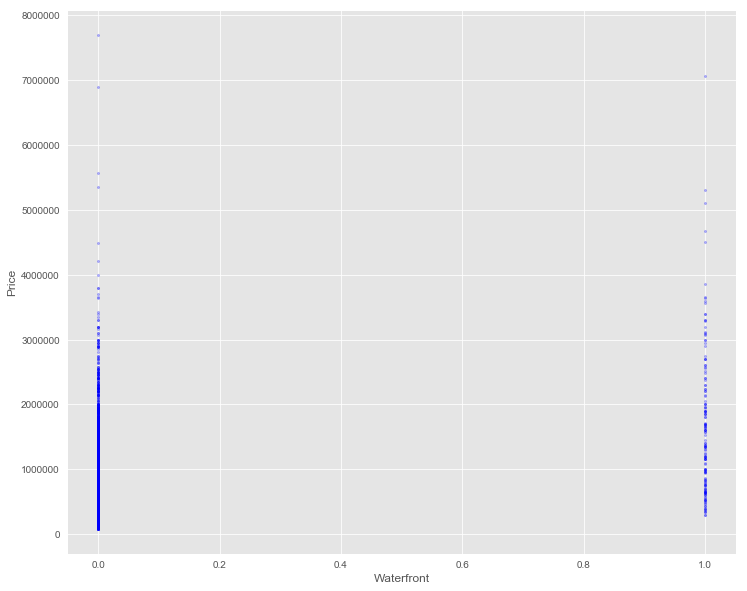

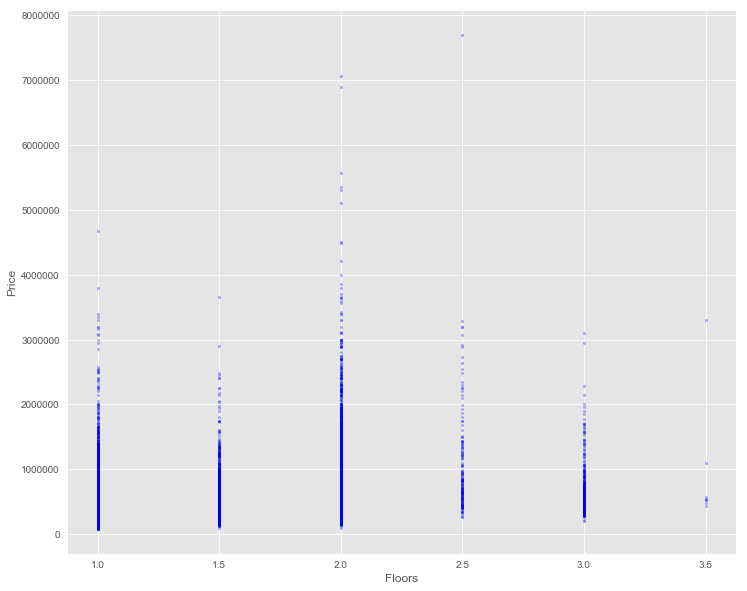

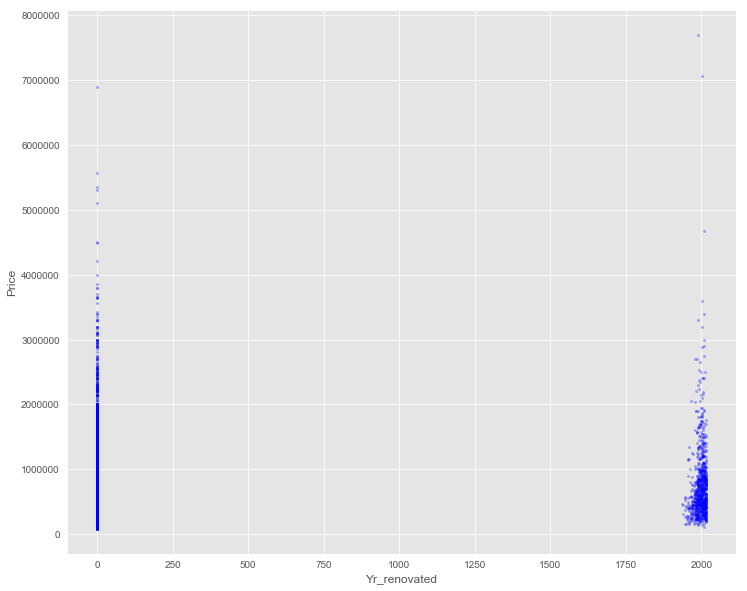

In [24]:
for f in features:
    plt.figure(figsize=(12,10))
    plt.scatter(housing_df[f], housing_df['price'], c="blue", alpha=0.3, s=5)
    plt.xlabel(f.capitalize())
    plt.ylabel('Price')

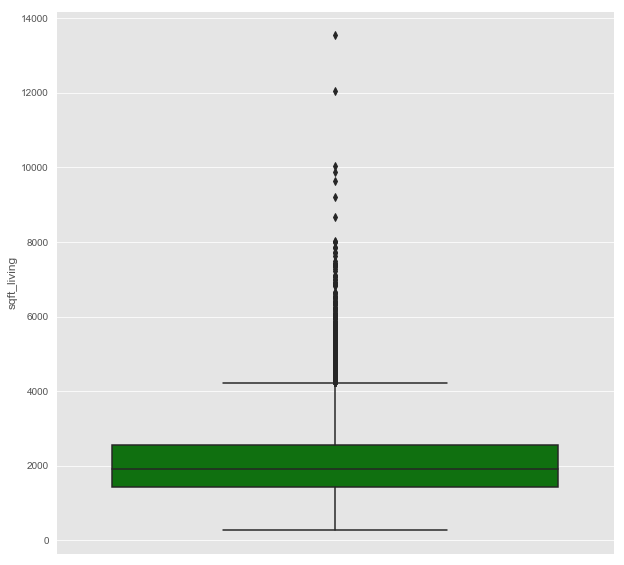

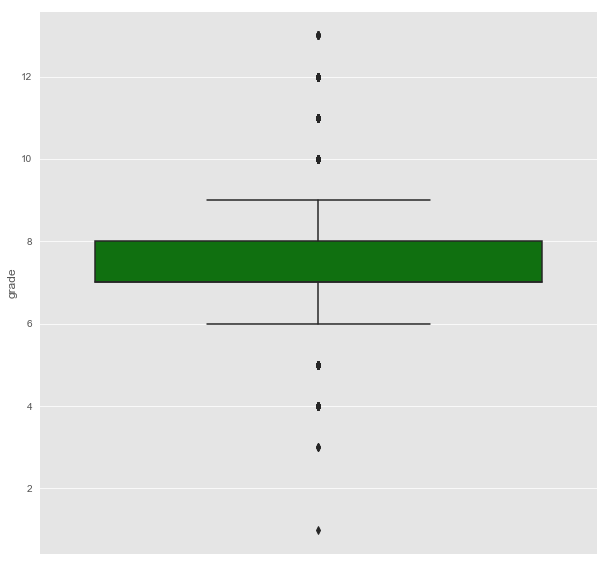

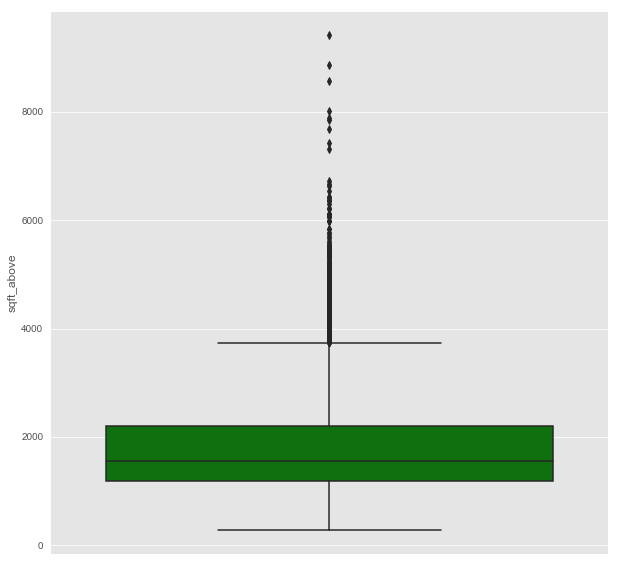

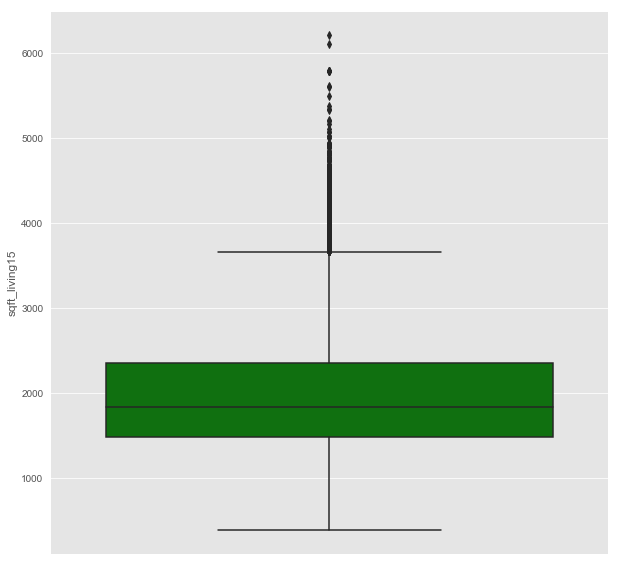

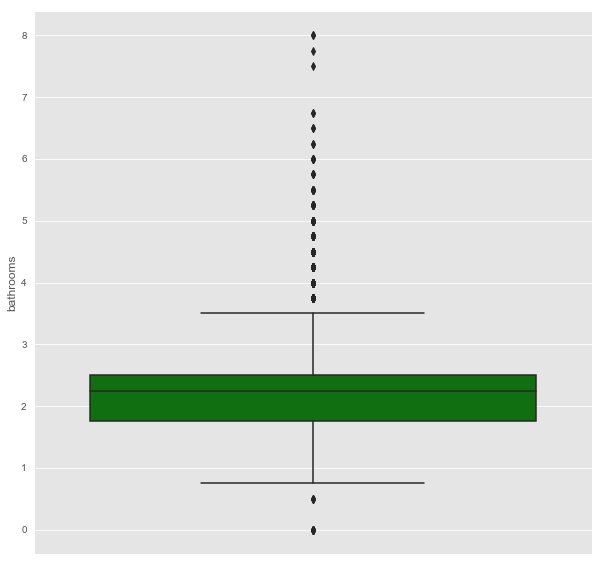

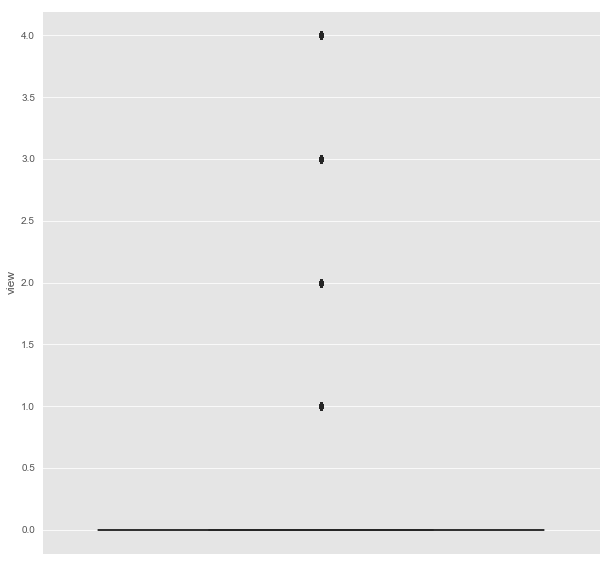

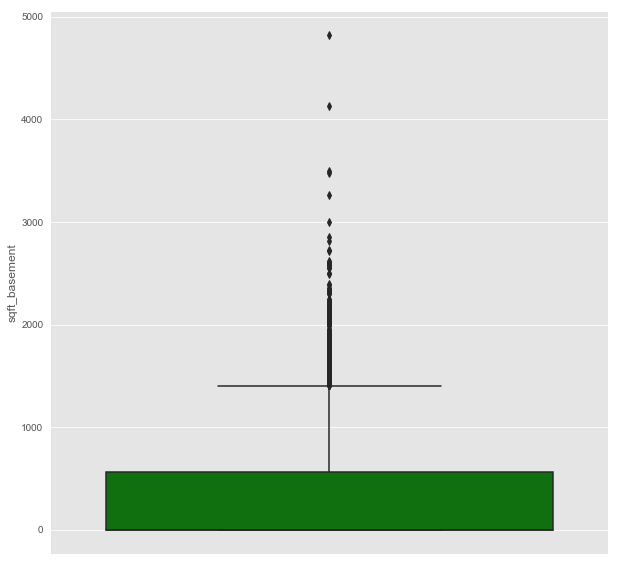

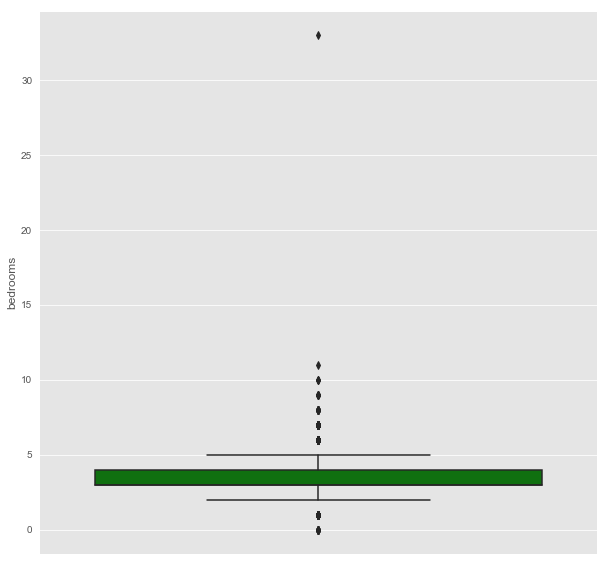

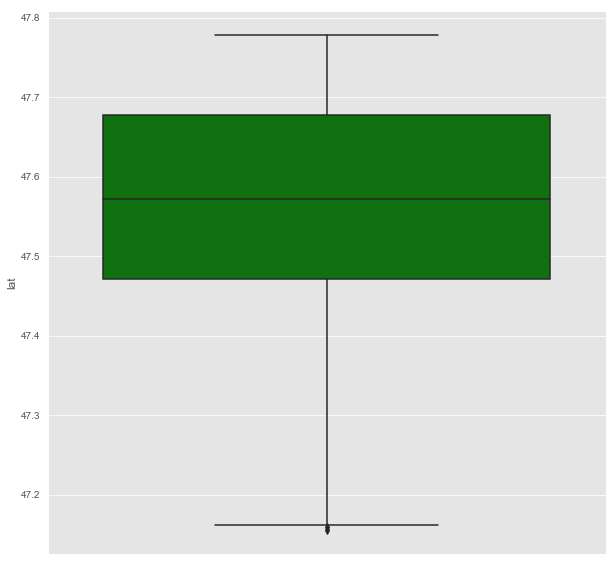

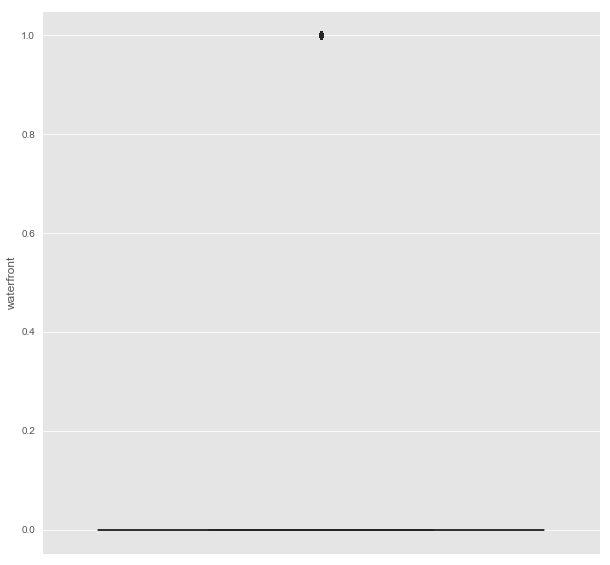

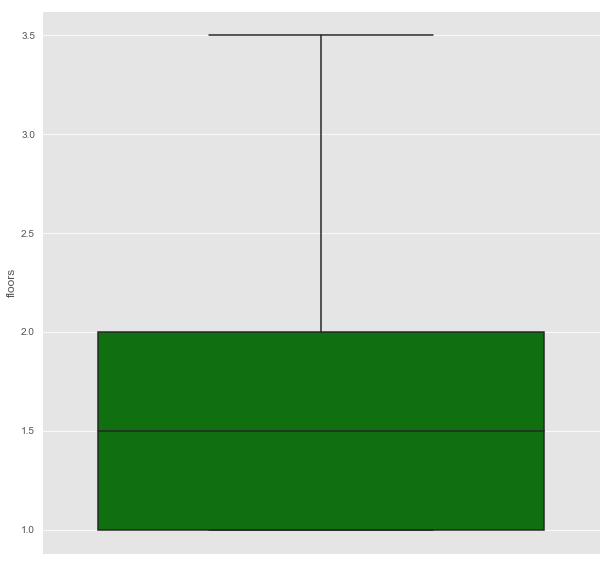

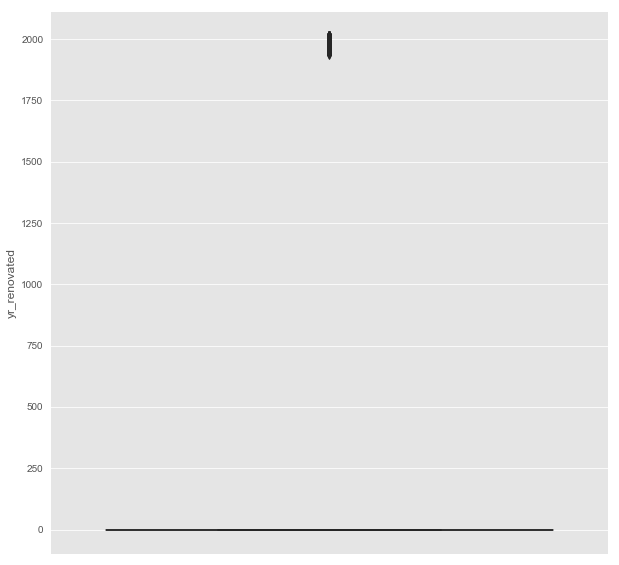

In [31]:
for f in features:
    plt.figure(figsize=(10,10))
    sns.boxplot(housing_df[f], orient='v', color='green')

Text(0.5, 1.0, 'Looks Like Seattle?')

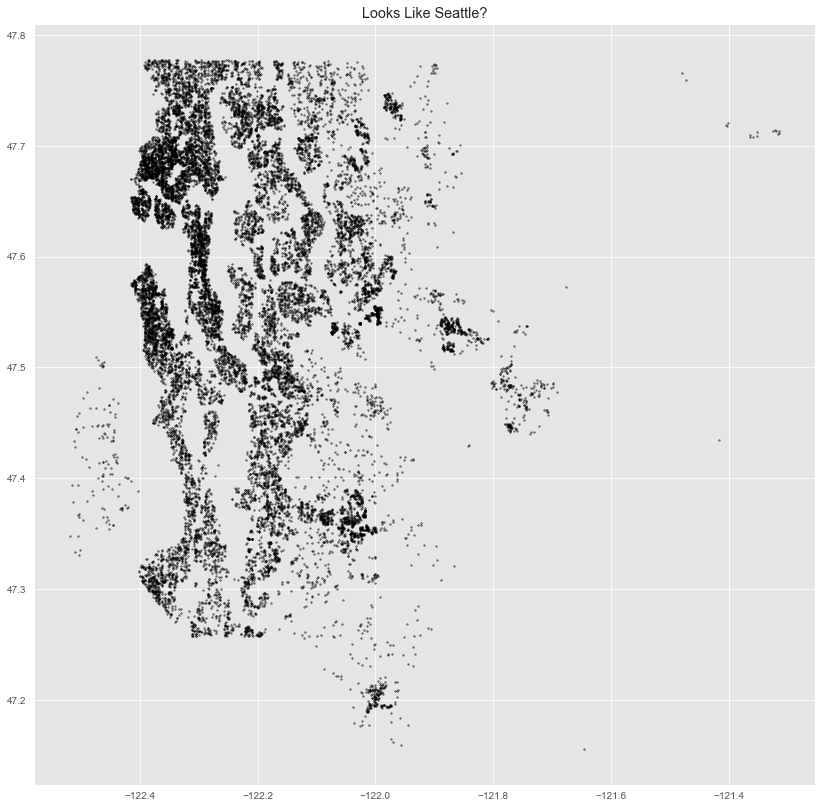

In [43]:
plt.figure(figsize=(14,14))
plt.scatter(housing_df['long'], housing_df['lat'], c="k", alpha=0.5, s=3)
plt.title("Looks Like Seattle?")

## Conclusions from looking at the data

* Bedrooms has one crazy outlier with ~33 bedrooms.

In [45]:
housing_df[housing_df['bedrooms'] > 30]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


Given that this house has 1620 square feet of living space, it is likely a data entry error; impute value to "3"

* Several features with correlation coefficents greater than 0.1 with price appear to have a basically linear relationship to price according to the scatterplots.  
 * Linear: square foot living, grade, square foot above, square foot living 15 (?), bathrooms, square foot basement
 * Non-linear: view, bedrooms, lat, waterfront, floors, year renovated

Correlation coefficents of features with non-linear relationships are high enough that they should not be ingnored.  
Conclusion: A non-linear model should be used.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [83]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler

In [69]:
baseline = housing_df['price'].std()
print('Baseline score for model to beat: {}'.format(baseline))

Baseline score for model to beat: 367362.23171800975


In [49]:
X = housing_df.drop(["id", "price", "date"], axis = 1)
y = housing_df['price']

In [59]:
scaler = StandardScaler()

In [60]:
X = scaler.fit_transform(X)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)

In [62]:
knn = KNeighborsRegressor(n_jobs=-1)

In [63]:
model = knn.fit(X_train, y_train)

In [72]:
cross_validate(model, X_train, y_train, cv=5, n_jobs=-1, return_train_score=True, scoring='neg_mean_absolute_error')

{'fit_time': array([0.05255413, 0.14910388, 0.09964085, 0.13360214, 0.39903212]),
 'score_time': array([0.62389708, 0.8818891 , 1.16511798, 1.02078891, 1.15400982]),
 'test_score': array([-91217.38433576, -93819.88863186, -90458.63370787, -87693.93278255,
        -93239.93679339]),
 'train_score': array([-73383.66039825, -73267.99624886, -73570.13540445, -74550.04985541,
        -73095.59755453])}

In [74]:
rf_model = RandomForestRegressor()

In [75]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [77]:
cross_validate(rf_model, X_train, y_train, cv=5, n_jobs=-1, return_train_score=True, scoring='neg_mean_absolute_error')

{'fit_time': array([0.86977315, 0.88693094, 0.9039979 , 0.90668893, 0.9119103 ]),
 'score_time': array([0.01106811, 0.01006627, 0.00910997, 0.00938797, 0.0094409 ]),
 'test_score': array([-74286.87123776, -75118.18567416, -75018.87061577, -77509.12856907,
        -75929.49559071]),
 'train_score': array([-30151.33440692, -29814.85141838, -30873.91007257, -30922.00809008,
        -30826.12901491])}

In [79]:
gb_model = GradientBoostingRegressor()

In [80]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [82]:
cross_validate(gb_model, X_train, y_train, cv=5, n_jobs=-1, return_train_score=True, scoring='neg_mean_absolute_error')

{'fit_time': array([1.5018518 , 1.57505608, 1.55150104, 1.50304008, 1.60060191]),
 'score_time': array([0.006001  , 0.00459099, 0.00528502, 0.00543094, 0.00427794]),
 'test_score': array([-77171.60819973, -78355.27762165, -77561.10853619, -78810.75770323,
        -77859.42757567]),
 'train_score': array([-71931.98283976, -71739.54757219, -71809.8848389 , -72077.92175271,
        -71210.73872073])}

In [84]:
lr_model = LinearRegression()

In [85]:
cross_validate(lr_model, X_train, y_train, cv=5, n_jobs=-1, return_train_score=True, scoring='neg_mean_absolute_error')

{'fit_time': array([0.45235395, 0.20638299, 0.3490169 , 0.37456083, 0.04300809]),
 'score_time': array([0.00100708, 0.00152898, 0.0011189 , 0.00122404, 0.00161505]),
 'test_score': array([-127045.35673811, -126728.86737994, -124379.75366753,
        -124263.48541112, -128069.47079012]),
 'train_score': array([-125426.91345309, -123593.93400588, -126806.78969071,
        -126726.72211493, -126101.65016741])}